In [1]:
# Short tutorial for classification using SKLearn
# Import basic things
import numpy as np
import pandas as pd
import glob

# Set print options so Pandas shows a lot of stuff!
# pd.options.display.width = 999
# pd.options.display.max_rows = 999
# pd.options.display.max_columns = 999

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid') # Set style so background is white

In [2]:
# Read in files -- the files are stored as Pandas DataFrames
extDir = '/Users/brianzhu/project/Pandas/skim'
sigFiles = glob.glob('%s/waveSkimDS1_*.h5' % extDir)
dfSigFull = pd.DataFrame()
sigList = []
for file in sigFiles:
    print(file)
    dfDummy = pd.read_hdf(file,'skimTree')
    sigList.append(dfDummy)

dfSigFull = pd.concat(sigList)
# Prints out first 5 lines of the DataFrame
# Each sample of the waveform is saved as wave# (eg: the 1st sample is wave0)
# Some basic parameters are saved like channel, run, trapENFCal, avse, and dcr99
dfSigFull.head()

/Users/brianzhu/project/Pandas/skim/waveSkimDS1_0.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_1.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_10.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_11.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_12.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_13.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_14.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_15.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_16.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_17.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_18.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_19.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_2.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_20.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_21.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_22.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_23.h5
/Users/brianzhu/project/Pandas/skim/waveSkimDS1_24.h5
/Users/brianzhu/project/Pandas/

,C,avse,channel,dcr99,mHL,run,trapENFCal,triggerTrapt0,wave0,wave1,...,wp9_90,wp9_91,wp9_92,wp9_93,wp9_94,wp9_95,wp9_96,wp9_97,wp9_98,wp9_99
0,1.0,2.003106,610.0,-0.000242,1.0,9422.0,1.006189,3871.874616,-94.304,-94.304,...,0.135522,0.047231,1.257602,0.697531,0.498072,1.809976,1.679407,1.174133,0.518915,0.551172
1,1.0,0.769360,664.0,-0.000446,1.0,9422.0,144.066708,6188.388670,-121.360,-121.360,...,0.030148,2.271374,0.960562,0.216657,0.261363,0.907161,1.366106,2.838942,1.044851,1.145107
2,1.0,2.019935,610.0,-0.000276,1.0,9422.0,1.079852,3245.197293,-94.684,-94.684,...,0.563957,2.360807,1.337860,0.933158,0.846809,1.152043,1.015324,1.383483,0.280333,0.042538
3,1.0,2.096106,610.0,-0.000344,1.0,9422.0,1.199417,4078.976218,-94.062,-94.062,...,0.316667,1.606495,0.509836,2.011213,0.758463,0.359615,0.568725,1.240840,0.940955,0.458604
4,1.0,-5.380731,610.0,-0.000303,1.0,9422.0,808.271610,6280.255255,-94.696,-94.696,...,1.635667,0.494055,0.190009,1.015524,1.687440,0.205909,0.681200,0.092648,2.145312,1.371779


In [6]:
# Looking at the shape of the dataframe as well as the end
# The shape shows the # of events vs # of parameters
print dfSigFull.shape
dfSigFull.tail()

(19441, 4072)


,C,avse,channel,dcr99,mHL,run,trapENFCal,triggerTrapt0,wave0,wave1,...,wp9_90,wp9_91,wp9_92,wp9_93,wp9_94,wp9_95,wp9_96,wp9_97,wp9_98,wp9_99
343,1.0,-0.989632,692.0,-0.000289,1.0,9952.0,305.634534,6323.798875,-101.748,-101.748,...,0.990054,1.192022,0.759605,1.085171,1.227309,1.484731,0.714803,0.345227,0.852589,0.545848
344,1.0,2.389404,610.0,-0.000272,1.0,9952.0,1.083037,3990.545602,-95.144,-95.144,...,1.753004,2.126622,0.126622,0.870302,0.576723,0.163857,0.178641,1.065935,0.776633,3.693324
345,1.0,-4.345406,672.0,-0.000175,1.0,9952.0,391.264030,6305.387876,-97.212,-97.212,...,1.271564,2.093649,0.750821,0.810031,1.532201,0.529602,2.587910,2.146133,0.769421,0.458373
346,1.0,-25.998368,664.0,-0.000284,1.0,9952.0,870.129434,6332.147375,-122.716,-122.716,...,0.972546,0.992838,2.499003,0.546479,0.556125,0.881705,0.793284,1.116551,0.913742,2.817032
347,1.0,0.506676,608.0,-0.000546,1.0,9952.0,794.511806,6277.956807,-56.994,-56.994,...,0.549604,1.037360,0.689163,1.344866,0.087655,2.620247,2.085276,1.076803,2.729978,0.321770


In [7]:
# The index (1st column) gets duplicated -- this is because the index resets for every file
# We can reset the index column -- this assures a unique index value for each event
dfSigReset = dfSigFull.reset_index()

# Check indices are correct now -- the previous index column is now called "index"
# We can rename it if it's confusing
print dfSigReset.shape[0]
dfSigReset.tail()

19441


,index,C,avse,channel,dcr99,mHL,run,trapENFCal,triggerTrapt0,wave0,...,wp9_90,wp9_91,wp9_92,wp9_93,wp9_94,wp9_95,wp9_96,wp9_97,wp9_98,wp9_99
19436,343,1.0,-0.989632,692.0,-0.000289,1.0,9952.0,305.634534,6323.798875,-101.748,...,0.990054,1.192022,0.759605,1.085171,1.227309,1.484731,0.714803,0.345227,0.852589,0.545848
19437,344,1.0,2.389404,610.0,-0.000272,1.0,9952.0,1.083037,3990.545602,-95.144,...,1.753004,2.126622,0.126622,0.870302,0.576723,0.163857,0.178641,1.065935,0.776633,3.693324
19438,345,1.0,-4.345406,672.0,-0.000175,1.0,9952.0,391.264030,6305.387876,-97.212,...,1.271564,2.093649,0.750821,0.810031,1.532201,0.529602,2.587910,2.146133,0.769421,0.458373
19439,346,1.0,-25.998368,664.0,-0.000284,1.0,9952.0,870.129434,6332.147375,-122.716,...,0.972546,0.992838,2.499003,0.546479,0.556125,0.881705,0.793284,1.116551,0.913742,2.817032
19440,347,1.0,0.506676,608.0,-0.000546,1.0,9952.0,794.511806,6277.956807,-56.994,...,0.549604,1.037360,0.689163,1.344866,0.087655,2.620247,2.085276,1.076803,2.729978,0.321770


In [9]:
# Make an array for features for training
# This will be used for training while keeping the other data
wave_cols = ['wave'+str(i) for i in range(10,2016)] # For Waveform
# wave_cols = ['wp'+str(i)+'_'+str(j) for i in range(10,16) for j in range(0,128)] # For Wavelet

print len(wave_cols) # Length should be 2006 (I found the 1st 10 samples to be bad generally)

2006


In [14]:
# Clean up the data as well as create basic training data
# We can make cuts for Pandas dataframe using the function "query" 
# It's not as flexible as a TCut in ROOT -- complicated math functions are harder to do

# Make two dataframes, one with avse < -5 (multi-site) and avse>-1 (single-site)
# Also cut the energy > 50
# This is a naive assumption that won't work very well... but it's just an example
dfMulti = dfSigReset.query('avse < -5 and trapENFCal > 50')
dfSingle = dfSigReset.query('avse > -1 and trapENFCal > 50')

# Add Column of zeros and ones for truth information
# Single Site = True, Multi-site = False
dfMulti.loc[:,'Truth'] = 0
dfSingle.loc[:,'Truth'] = 1

# Check the new dataframes are correct
# There are very few multi-site events (probably won't be great for training)
print dfMulti.shape
print dfSingle.shape
dfMulti.head()

(1143, 4074)
(7524, 4074)


,index,C,avse,channel,dcr99,mHL,run,trapENFCal,triggerTrapt0,wave0,...,wp9_91,wp9_92,wp9_93,wp9_94,wp9_95,wp9_96,wp9_97,wp9_98,wp9_99,Truth
4,4,1.0,-5.380731,610.0,-0.000303,1.0,9422.0,808.271610,6280.255255,-94.696,...,0.494055,0.190009,1.015524,1.687440,0.205909,0.681200,0.092648,2.145312,1.371779,0
19,19,1.0,-11.031821,582.0,-0.000030,1.0,9422.0,269.921058,1922.290580,-96.580,...,0.807371,0.370047,1.317638,2.593724,1.858919,0.412545,1.544646,1.898377,0.054312,0
21,21,1.0,-11.811770,600.0,-0.001042,1.0,9422.0,1194.548068,6263.898358,-148.174,...,2.345057,1.054031,0.378551,1.525080,0.048708,1.278986,1.079617,1.490554,0.670938,0
36,36,1.0,-27.600923,692.0,-0.000287,1.0,9422.0,625.771551,6238.417760,-100.776,...,0.662195,1.077188,0.430564,0.587184,1.690805,0.835772,0.096118,0.753586,1.506836,0
52,52,1.0,-7.686930,580.0,-0.000082,1.0,9422.0,334.872380,2001.140819,-99.454,...,0.090911,1.065860,1.512184,1.466431,2.206375,1.900075,0.630549,0.698377,0.412004,0


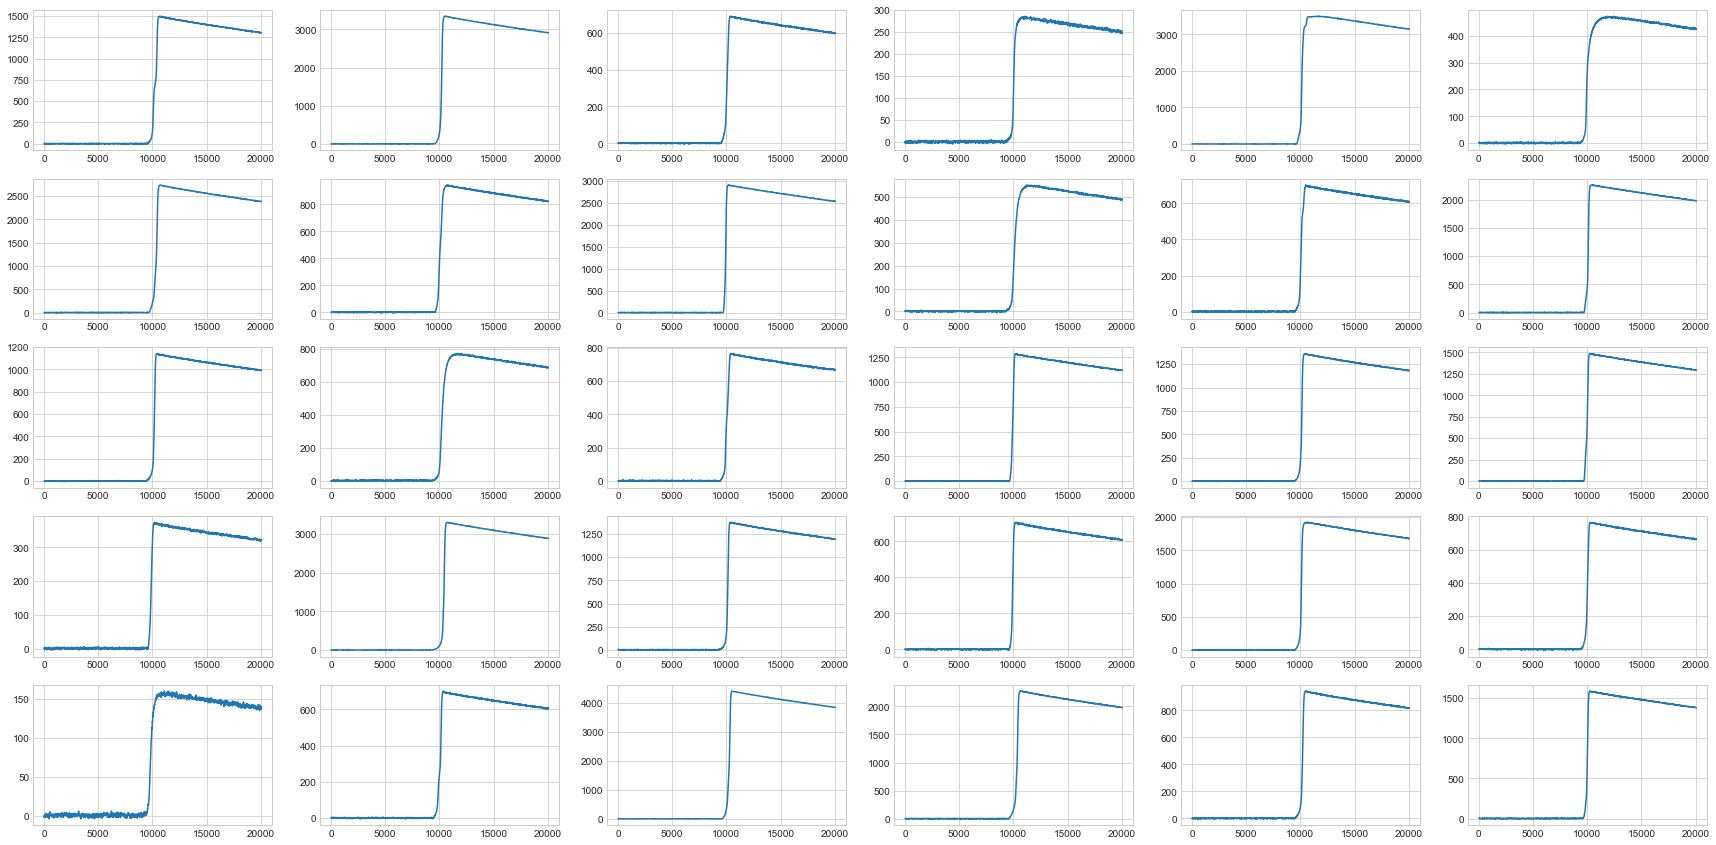

In [15]:
# Draw some multi-site waveforms -- make sure they're multi-site (they're not really...)
waveTS = np.linspace(0, len(wave_cols)*10, len(wave_cols))

# Randomly permutate the index of the dataframe to select some random waveforms
rndperm = np.random.permutation(dfMulti.index.values)

fig1 = plt.figure( figsize=(30,15) )
for i in range(0,30):
    ax = fig1.add_subplot(5,6,i+1)
    ax.plot(waveTS, dfMulti.loc[rndperm[i],wave_cols].values)

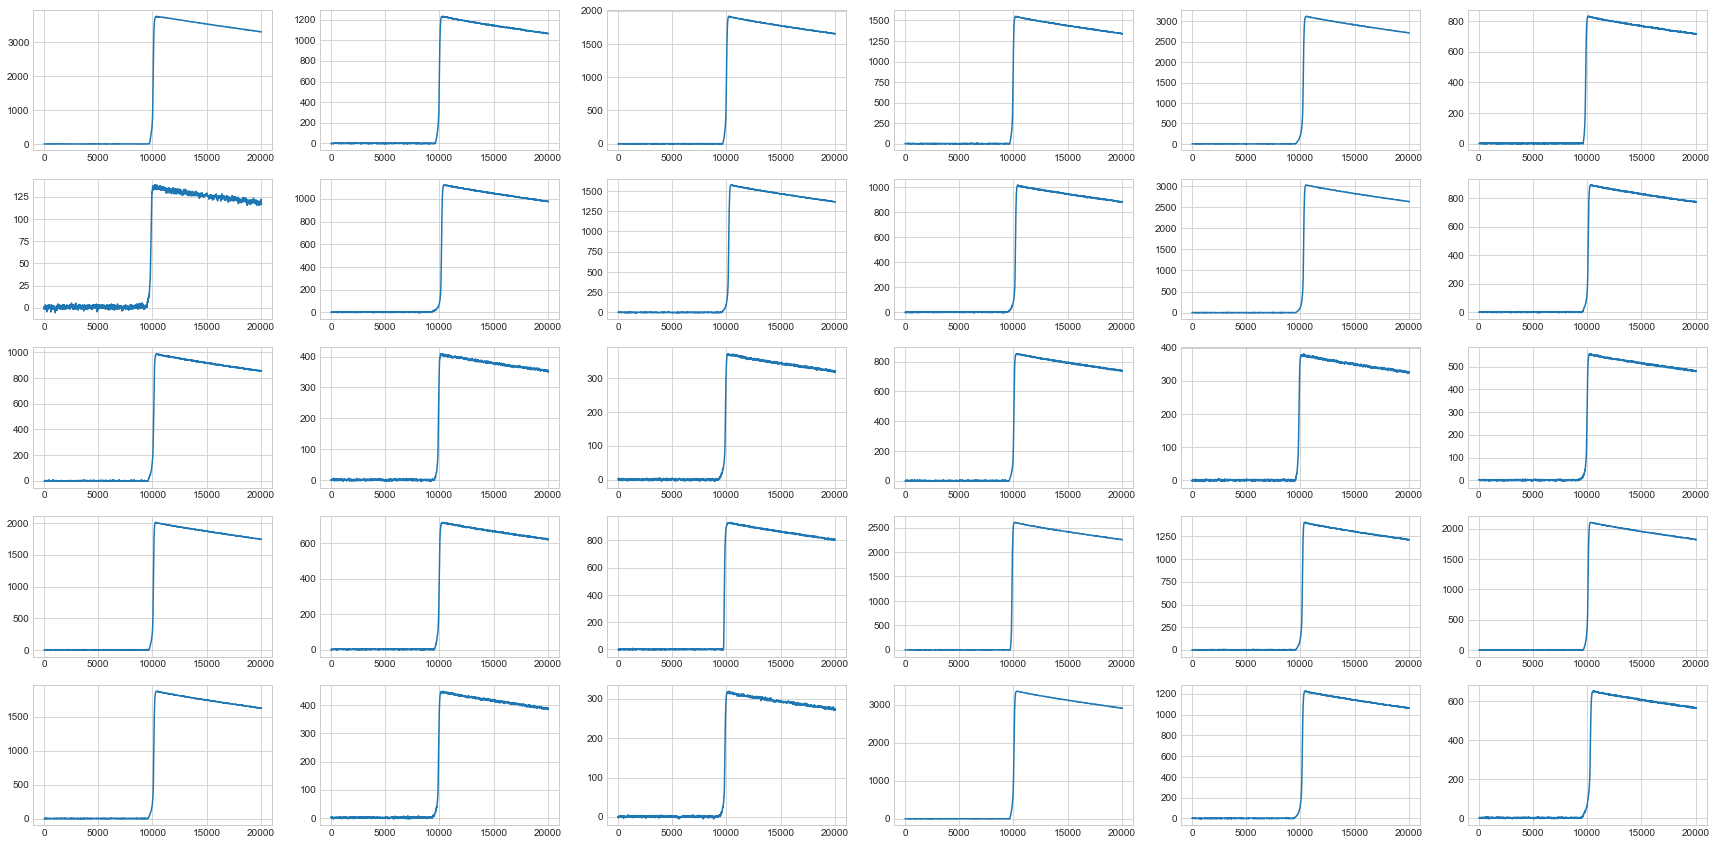

In [16]:
# Draw some single-site waveforms -- make sure they're single-site
# Randomly permutate the index of the dataframe to select some random waveforms
rndperm2 = np.random.permutation(dfSingle.index.values)

fig2 = plt.figure( figsize=(30,15) )
for i in range(0,30):
    ax2 = fig2.add_subplot(5,6,i+1)
    ax2.plot(waveTS, dfSingle.loc[rndperm2[i],wave_cols].values)

In [17]:
# Split up training data for testing
# sklearn has a simple function for doing this
from sklearn.model_selection import train_test_split

# Combine the multi and single into one total dataframe
TotalDF = pd.concat([dfSingle,dfMulti])
TotalDF.head()
print (TotalDF.shape)

# Split it twice, first split creates development (with 66% of data) and evaluation set
# 2nd split is for training and testing the training
DF_dev, DF_eval = train_test_split(TotalDF, test_size=0.33, random_state=42)
DF_train, DF_test = train_test_split(DF_dev, test_size=0.33, random_state=492)

# Print out how many events are left by the shape
print(DF_dev.shape, DF_eval.shape, DF_train.shape, DF_test.shape)
# Print out all the column names
print(DF_dev.columns.values)

(8667, 4074)
((5806, 4074), (2861, 4074), (3890, 4074), (1916, 4074))
['index' 'C' 'avse' ..., 'wp9_98' 'wp9_99' 'Truth']


In [18]:
# Import basic neural network classifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, roc_auc_score
# Normalization and scaling of data before using it in machine learning
from sklearn import preprocessing

In [19]:
# MLP -- hidden layer sizes: N, N-1

MLP = MLPClassifier(solver='adam', activation='tanh', alpha=1e-5, hidden_layer_sizes=(2016, 2015), random_state=1, max_iter=500, verbose=True)
# For the "fit" function, sklearn takes a X and Y input
# X = a matrix with all of the training parameters; Y = array with truth values only
MLP.fit( DF_train.loc[:,wave_cols].values, DF_train['Truth'] )

Iteration 1, loss = 1.15918486
Iteration 2, loss = 0.42050741
Iteration 3, loss = 0.40214575
Iteration 4, loss = 0.39663053
Iteration 5, loss = 0.39184812
Iteration 6, loss = 0.39336029
Iteration 7, loss = 0.39501720
Iteration 8, loss = 0.39356070
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2016, 2015), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [20]:
# Assess the performance:
from sklearn.metrics import classification_report, roc_auc_score

acc_MLP = round(MLP.score(DF_train.loc[:,wave_cols].values, DF_train['Truth'])*100,2)
print(acc_MLP)

# There's too few events to really get a good training for multi-site events
Y_test = MLP.predict(DF_test.loc[:,wave_cols].values)
print classification_report(DF_test['Truth'], Y_test,
                            target_names=["Multi-site", "Single-site"])
print MLP.predict_proba(DF_test.loc[:,wave_cols].values)

86.76


/Users/brianzhu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

 Multi-site       0.00      0.00      0.00       250
Single-site       0.87      1.00      0.93      1666

avg / total       0.76      0.87      0.81      1916

[[ 0.10959989  0.89040011]
 [ 0.10959989  0.89040011]
 [ 0.10959989  0.89040011]
 ..., 
 [ 0.10959989  0.89040011]
 [ 0.10959989  0.89040011]
 [ 0.10959989  0.89040011]]
